## Day 34 Lecture 1 Assignment

In this assignment, we will learn about SVR. We will use the absenteeism at work dataset loaded below and analyze the model generated for this dataset.

In [14]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import ds_useful as ds

In [15]:
absent = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Absenteeism_at_work.csv', sep=';')

In [16]:
absent.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


Recall that we removed all correlated columns as well as columns that are a function of two or more other columns (like BMI and weight and height) as well as columns that are not usefu to us (like ID).
We also created dummy variables for the categorical columns in our dataset.
Finally, we split the data into test and train (with test being 20% of the data).

Perform these actions below.

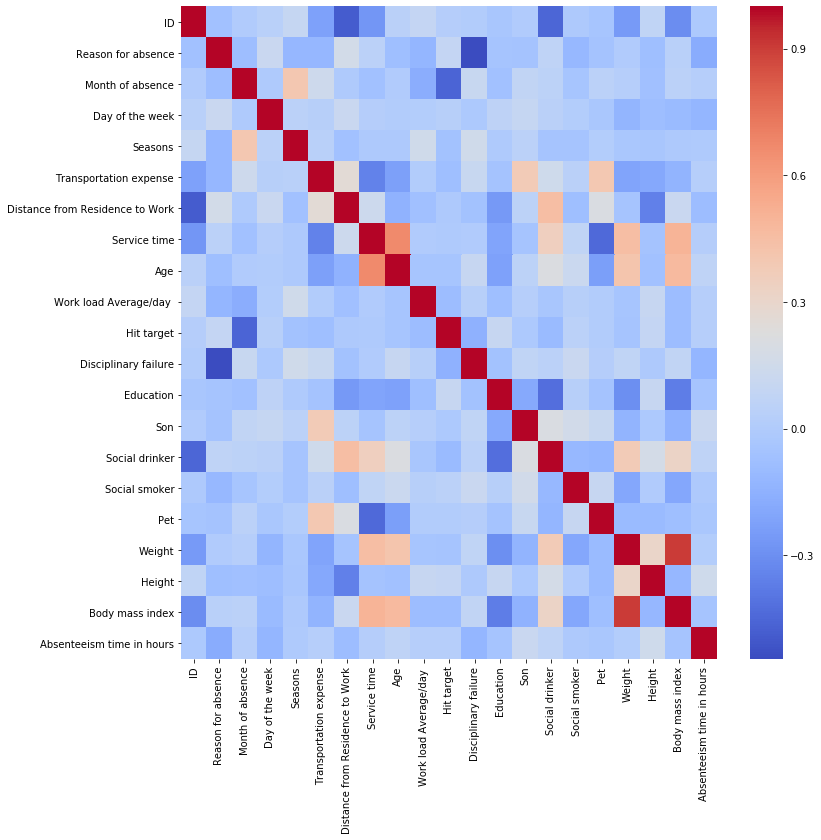

In [17]:
corr = absent.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

In [18]:
ds.similar_variables(absent, 'Absenteeism time in hours', print_log=True, similarity_threshold=.5)
print('Notice that BMI is correlated with Height and Weight. We\'ll remove those two instead, since BMI is an interaction between the two and can represent their variance.')
print('We drop month because it is correlated with Season, and season has less classes')
print('Finally, we drop service time to keep age')

drop_cols = ['ID', 'Month of absence', 'Transportation expense', 'Service time', 'Son', 'Pet', 'Weight', 'Height']

absent.drop(drop_cols, axis=1, inplace=True)

Reason for absence   -0.124248
Service time          0.065760
Body mass index      -0.049719
dtype: float64
Notice that BMI is correlated with Height and Weight. We'll remove those two instead, since BMI is an interaction between the two and can represent their variance.
We drop month because it is correlated with Season, and season has less classes
Finally, we drop service time to keep age


In [19]:
def get_categorical_columns(df, unique_thresh=10, non_binary=False):
    columns = []
    for col in df.columns:
        if df[col].nunique() < unique_thresh:
            if non_binary and df[col].nunique() < 2:
                continue
            columns.append(col)
    return columns

cat_cols = get_categorical_columns(absent, unique_thresh=18, non_binary=True)
cat_cols

# absent[cat_cols] = absent[cat_cols].astype('object')

['Day of the week',
 'Seasons',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Social drinker',
 'Social smoker',
 'Body mass index']

In [20]:
absent_feat = pd.get_dummies(absent, columns=cat_cols, drop_first=True)
absent_feat

,Reason for absence,Distance from Residence to Work,Age,Work load Average/day,Absenteeism time in hours,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_2,...,Body mass index_28,Body mass index_29,Body mass index_30,Body mass index_31,Body mass index_32,Body mass index_33,Body mass index_34,Body mass index_35,Body mass index_36,Body mass index_38
0,26,36,33,239.554,4,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,13,50,239.554,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23,51,38,239.554,2,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,7,5,39,239.554,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,36,33,239.554,2,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,14,36,33,264.604,8,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
736,11,11,37,264.604,4,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
737,0,14,40,271.219,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
738,0,35,39,271.219,0,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


Split the data into train and test (test proportion=0.2).

In [21]:
# answer below:
from sklearn.model_selection import train_test_split

X = absent_feat.drop('Absenteeism time in hours', axis=1)
Y = absent_feat['Absenteeism time in hours']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=4)

Scale the indepdendent variables using the standard scaler

In [22]:
# answer below:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train.loc[:,X_train.nunique() > 2] = ss.fit_transform(X_train.loc[:,X_train.nunique() > 2])
X_test.loc[:,X_test.nunique() > 2] = ss.transform(X_test.loc[:,X_test.nunique() > 2])

X_train.head()

,Reason for absence,Distance from Residence to Work,Age,Work load Average/day,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_2,Seasons_3,...,Body mass index_28,Body mass index_29,Body mass index_30,Body mass index_31,Body mass index_32,Body mass index_33,Body mass index_34,Body mass index_35,Body mass index_36,Body mass index_38
8,-0.044414,-1.209081,-0.362904,-0.792243,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,-1.605195,1.424931,0.259367,0.322363,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
640,0.675946,-1.074003,3.370724,-1.227239,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
155,1.036126,1.357392,-0.674040,1.806482,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
338,0.435826,1.424931,0.259367,0.322363,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Generate an SVR model to predict the number of hours of absenteeism. Compare the train and test scores.

In [23]:
# answer below:
from sklearn.svm import SVR

svm = SVR(kernel='rbf', epsilon=.1, C=1)
svm.fit(X_train, Y_train)

print('Training score:', svm.score(X_train, Y_train))
print('Testing score: ', svm.score(X_test, Y_test))

Training score: 0.057508017202835715
Testing score:  0.025236604029421298


If you are unhappy with your model's performance, perform a grid search to optimize C.

In [27]:
# answer below:
from sklearn.model_selection import GridSearchCV

csvm = GridSearchCV(svm, param_grid={'kernel': ['linear', 'rbf', 'poly'], 'C': [.001, .1, 10, 1000], 'epsilon':[.01,.1]})
csvm.fit(X_train, Y_train)

print(csvm.best_params_)
print(csvm.best_score_)

{'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
0.09767611939770868


In [28]:
from sklearn.metrics import mean_squared_error

svm = SVR(kernel=csvm.best_params_['kernel'], epsilon=csvm.best_params_['epsilon'], C=csvm.best_params_['C'])
svm.fit(X_train, Y_train)

print('Training score:', svm.score(X_train, Y_train))
print('Testing score: ', svm.score(X_test, Y_test))
print('MSE:           ', mean_squared_error(Y_test, svm.predict(X_test)))

Training score: 0.1767522346956404
Testing score:  0.057595914624392064
MSE:            187.01192473222497
